In [1]:
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
#import chart_studio.plotly as py   
import scipy.stats as stats
import statsmodels 
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [2]:
rt = pd.read_excel('/home/cleyton/Dropbox/producao_academica/textos_desenvolvidos/magnetic_effect/dados_rais/dados/rotatividade/rotatividadegeral.xlsx',
                  sheet_name = 'rotatividade', 
                   usecols = ['Altamira', 'Tucurui', 'tempo'])

pop = pd.read_excel('/home/cleyton/Documentos/jupyter/dados_populacao/tabela6579.xlsx', 
                  header = 3, 
                    usecols = ['Altamira', 'Tucurui', 'Ano', 'Pará', 'var_tucurui', 'var_para', 'var_altamira'])

In [3]:
from matplotlib.pylab import rcParams  #ajustando o matplot para um tamanho maior
rcParams['figure.figsize'] = 15, 6

In [4]:
rt.dropna(inplace = True)

In [5]:
rt

tempo   Altamira    Tucurui
0   2004-02-01   7.350746  11.904762
1   2004-03-01   3.283582  22.619048
2   2004-04-01   3.768657   5.952381
3   2004-05-01   6.417910  30.952381
4   2004-06-01   7.985075  10.714286
..         ...        ...        ...
186 2019-08-01   8.661417   2.072357
187 2019-09-01  16.666667   1.932537
188 2019-10-01   9.600000   1.265378
189 2019-11-01   3.225806   0.351617
190 2019-12-01   0.813008   0.070348

[191 rows x 3 columns]

In [6]:
rt['Altamira'].describe()

count    191.000000
mean       4.317325
std        3.836972
min        0.000000
25%        1.463178
50%        3.445875
75%        6.284804
max       20.975610
Name: Altamira, dtype: float64

In [7]:
#https://medium.com/nerd-for-tech/enriching-data-visualizations-with-annotations-in-plotly-using-python-6127ff6e0f80

In [8]:
rt['Altamira_mean'] = [np.mean(rt.Altamira)]*len(rt)
rt['Tucurui_mean'] = [np.mean(rt.Tucurui)]*len(rt)

fig1 = px.line(rt, x = 'tempo', y = ['Altamira'], color_discrete_map={
                 "Altamira": "black"},
              title = 'Taxa de Rotatividade do trabalho em Altamira 2004/2019',
              labels = {'tempo': 'Ano', 'variable':'Município', 'value': 'Valores',
                       'Altamira_mean':'Altamira Média'}, template="simple_white")

fig1.add_vrect(x0="2012-04-01", x1="2013-12-01", 
              annotation_text="Conflitos<br>Sociais", 
               annotation_position="top left",  
            annotation=dict(font_size=13, font_color = 'black', font_family="Sans Serif"),
              fillcolor="red", opacity=0.25, line_width=0)

fig1.add_vline(x='2011-06-01', line_width=3, line_color="gray", opacity=0.75) 


fig1.add_annotation(x='2011-06-01', 
                    y = 9.029, 
                    text = 'Licença de <br>Instalação <br>nº 795/2011',
                  align='left', 
                    yanchor='bottom', 
                    showarrow = False,
                   font_family='Sans Serif',
                   font_size = 13,
                   font_color= 'black')


fig1.add_vline(x='2014-12-01', line_width=3, line_color="gray", opacity=0.55) 
fig1.add_annotation(x='2014-12-01', 
                    y = 14, 
                    text = 'População chega <br>a 140 mil hab',
                  align='left', 
                    yanchor='bottom', 
                    showarrow = False,
                   font_family='Sans Serif',
                   font_size = 13,
                   font_color= 'black')


fig1.add_vline(x='2008-12-01', line_width=3, line_color="gray", opacity=0.55)
fig1.add_annotation(x='2008-12-01', 
                    y = 19, 
                    text = 'Taxa de crescimento<br>Pop. chega a 13,06%',
                  align='left', 
                    yanchor='bottom', 
                    showarrow = False,
                   font_family='Sans Serif',
                   font_size = 13,
                   font_color= 'black')

fig1.add_vrect(x0="2004-05-01", x1="2007-05-01", 
              annotation_text="Redução Pop Rural", 
               annotation_position="top left",  
            annotation=dict(font_size=13, font_color = 'black', font_family="Sans Serif"),
              fillcolor="green", opacity=0.25, line_width=0)

fig1.add_vrect(x0="2016-11-01", x1="2019-11-01", 
              annotation_text="Operações <br>Comerciais", 
               annotation_position="top right",  
            annotation=dict(font_size=13, font_color = 'black', font_family="Sans Serif"),
              fillcolor="blue", opacity=0.25, line_width=0)


fig1.show()

In [9]:
fig2 = px.line(pop,  x = 'Ano', y = ['Altamira', 'Tucurui'], 
              title = 'População em Tucuruí e Altamira 2004/2019',
              labels = {'tempo': 'Ano', 'variable':'Municípios', 'value': 'Valores'})
fig2.show()

In [10]:
fig3 = px.line(pop, x = 'Ano', y = ['var_altamira', 'var_para'], 
              title = 'Taxa de Crescimento Populacional em Altamira e Pará  2002/2021',
               color_discrete_map={
                 "var_altamira": "black", 'var_para':'red'},
              labels = {'tempo': 'Ano', 'variable':'Municípios', 'value': 'Valores'}, 
               template="simple_white"
              )
fig3.show()


In [11]:
rt_a = pd.Series(rt['Altamira'].values, index = rt['tempo'])
rt_t = pd.Series(rt['Tucurui'].values, index = rt['tempo'])

In [12]:
#testes tsa

import statsmodels #bib statsmodels

import seaborn as sns #normalidade
import scipy.stats as stats #normalidade
from statsmodels.stats.diagnostic import lilliefors #normalidade
import statsmodels.tsa.stattools #estacionaridade
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf #autocorrelação
from statsmodels.tsa.seasonal import seasonal_decompose #decomposição

In [13]:
def normalidade(serie):
    while True:
        l, p_valor_lil = statsmodels.stats.diagnostic.lilliefors(serie, dist = 'norm')
        if p_valor_lil < 0.05: 
            print('Teste Lilliefors: {} Não Estocástico!'.format(p_valor_lil))
        else:
            print('Teste Lilliefors: {} Estocástico!'.format(p_valor_lil))
        s, p_valor_shap = stats.shapiro(serie)
        if p_valor_shap < 0.05:
            print('Teste Shapiro-Wilk: {} Não Estocástico!'.format(p_valor_shap))
        else:
            print('Teste Shapiro-Wilk: {} Estocástico!'.format(p_valor_shap))
        break
        return   

In [14]:
def estacionario(serie):
    v1 = []
    v2 = []
    while True:
        kpss = statsmodels.tsa.stattools.kpss(serie)
        for chave, valor in kpss[3].items():
            if valor > kpss[0]:
                v1.append(chave)
                if len(v1) < 2:                            
                    print('Teste KPSS: A série é estacionária a: {} com valor-teste de {}'.format(chave, v1[0], kpss[0]))
                else:
                    if len(v1) < 3:
                         print('Teste KPSS: A série é estacionária a: {} com valor-teste de {}'.format(v1[1], kpss[0]))
                    elif 3 <= len(v1) < 4:
                        print('Teste KPSS: A série é estacionária a: {} com valor-teste de {}'.format(v1[2], kpss[0]))
                    else:
                         print('Teste KPSS: A série é estacionária a: {} com valor-teste de {}'.format(v1[3], kpss[0]))
            else: 
                print('Teste KPSS: a série não é estacionária a nenhum valor crítico!')
                break
            
        df = statsmodels.tsa.stattools.adfuller(serie)
        list(df)
        for chave, valor in df[4].items():
            if valor > df[0]:
                print('Teste Dickey-Fuller: a série é estacionário somente a {}, {} chave e com valor-teste de {}'.format(chave, valor, df[0]))
            else:
                print('Teste Dickey-Fuller: A série não é estacionária a nenhum valor crítico!')
                break
        break
        return

In [15]:
rep = [rt_a, rt_t]
for i in rep:
    normalidade(i)

Teste Lilliefors: 0.0009999999999998899 Não Estocástico!
Teste Shapiro-Wilk: 4.5593385837594536e-12 Não Estocástico!
Teste Lilliefors: 0.0009999999999998899 Não Estocástico!
Teste Shapiro-Wilk: 9.089248823805195e-15 Não Estocástico!


In [16]:
for i in rep:
    estacionario(i)

/home/cleyton/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:2016: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




Teste KPSS: A série é estacionária a: 10% com valor-teste de 10%
Teste KPSS: A série é estacionária a: 5% com valor-teste de 0.3022874817440551
Teste KPSS: A série é estacionária a: 2.5% com valor-teste de 0.3022874817440551
Teste KPSS: A série é estacionária a: 1% com valor-teste de 0.3022874817440551
Teste Dickey-Fuller: A série não é estacionária a nenhum valor crítico!
Teste KPSS: A série é estacionária a: 10% com valor-teste de 10%
Teste KPSS: A série é estacionária a: 5% com valor-teste de 0.3277378838667678
Teste KPSS: A série é estacionária a: 2.5% com valor-teste de 0.3277378838667678
Teste KPSS: A série é estacionária a: 1% com valor-teste de 0.3277378838667678
Teste Dickey-Fuller: a série é estacionário somente a 1%, -3.4662005731940853 chave e com valor-teste de -4.162304497525554
Teste Dickey-Fuller: a série é estacionário somente a 5%, -2.8772932777920364 chave e com valor-teste de -4.162304497525554
Teste Dickey-Fuller: a série é estacionário somente a 10%, -2.5751677501

/home/cleyton/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:2016: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




Conclusão: a única série estacionária é Tucuruí, o resto não é.

In [17]:
drt_a = np.diff(rt_a)
drt_a_m = [np.mean(drt_a)]*len(drt_a) #média da diferenciação

ano = pd.date_range('2004-02-01', periods = len(drt_a), freq = 'M')

drt_a = pd.Series(drt_a, index = ano)
drt_a_m = pd.Series(drt_a_m, index = ano)

fig3 = px.line(x = ano, y = [drt_a, drt_a_m],  
              title = 'Rotatividade do trabalho em Altamira com Diferenciação 2004/2019',
              labels = {'tempo': 'Ano', 'variable':'Variáveis', 'value': 'Valores',
                       'wide_variable_1':'Altamira Média', 'x':'Ano'})
fig3.show()

In [18]:
drt_t = np.diff(rt_t)
drt_t_m = [np.mean(drt_t)]*len(drt_t) #média da diferenciação

drt_t = pd.Series(drt_t, index = ano)
drt_t_m = pd.Series(drt_t_m, index = ano)

fig4 = px.line(x = ano, y = [drt_t, drt_t_m],  
              title = 'Rotatividade do trabalho em Tucuruí com Diferenciação 2004/2019',
              labels = {'tempo': 'Ano', 'variable':'Variáveis', 'value': 'Valores',
                       'wide_variable_1':'Altamira Média', 'x':'Ano'})
fig4.show()

/home/cleyton/anaconda3/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning:

divide by zero encountered in log



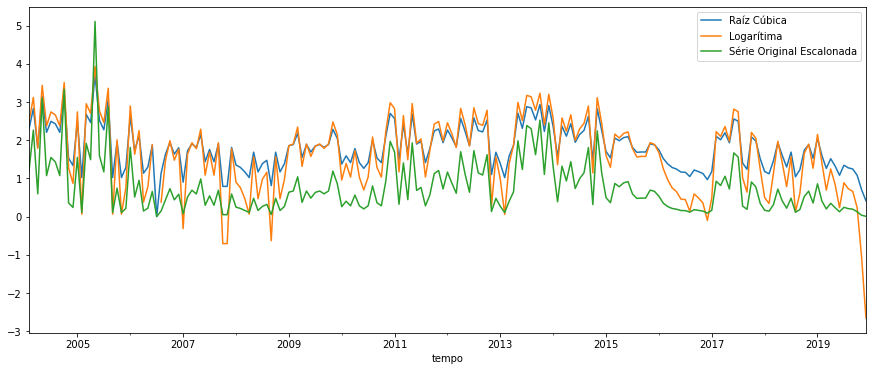

In [19]:
#Transformações para melhorar a variância das duas séries

#2ª Transf -- **(1/3)

rt_te = rt_t**(1/3)
rt_te.plot(label = 'Raíz Cúbica')

#3º Transf -- log

rt_tl = np.log(rt_t)
rt_tl.plot(label = 'Logarítima')

r = rt_t/10

r.plot(label = 'Série Original Escalonada')

plt.legend(loc = 'best')
plt.show()


/home/cleyton/anaconda3/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning:

divide by zero encountered in log



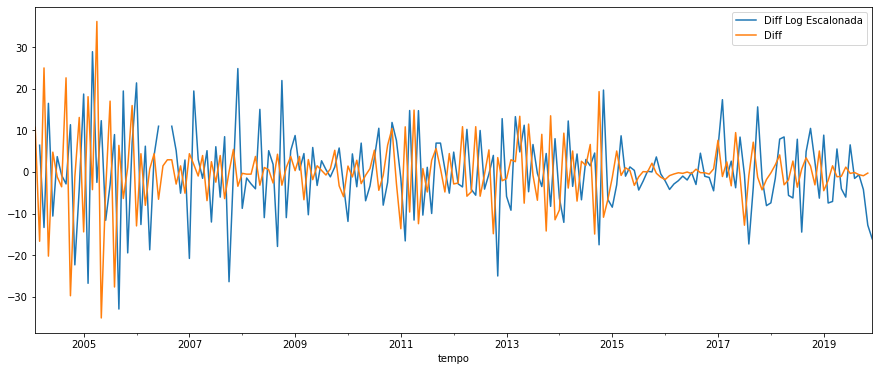

In [20]:
#4º Transf -- Diff Log

rt_tdl = 10*np.log(rt_t).diff() #escalonando em 10

rt_tdl.plot(label = 'Diff Log Escalonada')

drt_t.plot(label = 'Diff')

plt.legend(loc = 'best')
plt.show()

A raíz cúbica e a diferenciação logarítima ajustam a normalidade e garantem estacionaridade da série para Tucuruí

/home/cleyton/anaconda3/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning:

divide by zero encountered in log



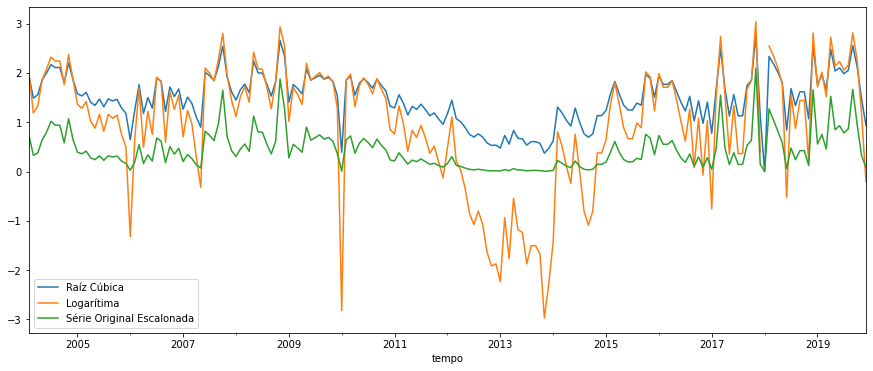

In [21]:
#O mesmo para Altamira


#2ª Transf -- **(1/3)

rt_ae = rt_a**(1/3)
rt_ae.plot(label = 'Raíz Cúbica')

#3º Transf -- log

rt_al = np.log(rt_a)
rt_al.plot(label = 'Logarítima')

r = rt_a/10

r.plot(label = 'Série Original Escalonada')

plt.legend(loc = 'best')
plt.show()

/home/cleyton/anaconda3/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning:

divide by zero encountered in log



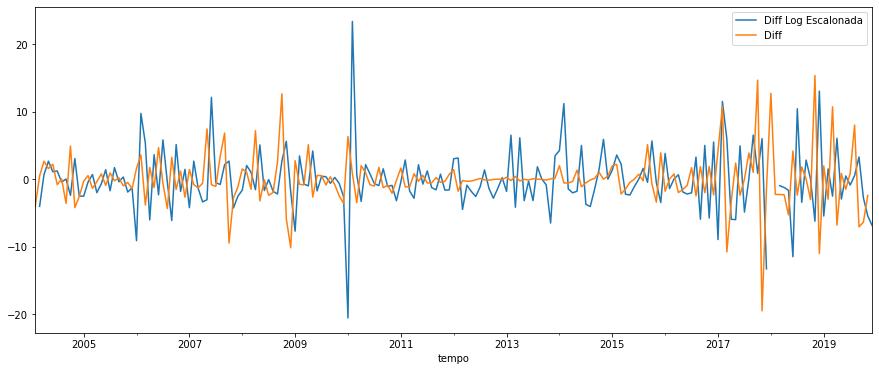

In [22]:
#4º Transf -- Diff Log

rt_adl = 5*np.log(rt_a).diff() #escalonando em 5

rt_adl.plot(label = 'Diff Log Escalonada')

drt_a.plot(label = 'Diff')

plt.legend(loc = 'best')
plt.show()

In [23]:
#testando a normalidade das séries cúbicas 

e = [rt_te, rt_ae]

for i in e:
    normalidade(i)

Teste Lilliefors: 0.34540859776389926 Estocástico!
Teste Shapiro-Wilk: 0.23054014146327972 Estocástico!
Teste Lilliefors: 0.34316908739232066 Estocástico!
Teste Shapiro-Wilk: 0.19978265464305878 Estocástico!


In [24]:
#testando estacionaridade das séries cúbicas
for i in e:
    estacionario(i)

Teste KPSS: A série é estacionária a: 10% com valor-teste de 10%
Teste KPSS: A série é estacionária a: 5% com valor-teste de 0.2888796133306228
Teste KPSS: A série é estacionária a: 2.5% com valor-teste de 0.2888796133306228
Teste KPSS: A série é estacionária a: 1% com valor-teste de 0.2888796133306228
Teste Dickey-Fuller: a série é estacionário somente a 1%, -3.4662005731940853 chave e com valor-teste de -3.661975477130308
Teste Dickey-Fuller: a série é estacionário somente a 5%, -2.8772932777920364 chave e com valor-teste de -3.661975477130308
Teste Dickey-Fuller: a série é estacionário somente a 10%, -2.575167750182615 chave e com valor-teste de -3.661975477130308
Teste KPSS: A série é estacionária a: 10% com valor-teste de 10%
Teste KPSS: A série é estacionária a: 5% com valor-teste de 0.3321774300579532
Teste KPSS: A série é estacionária a: 2.5% com valor-teste de 0.3321774300579532
Teste KPSS: A série é estacionária a: 1% com valor-teste de 0.3321774300579532
Teste Dickey-Fuller:

/home/cleyton/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:2016: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


/home/cleyton/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:2016: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




/home/cleyton/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/home/cleyton/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/home/cleyton/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density p

Text(0.5, 1.0, 'Raíz Cúbica Tucuruí')

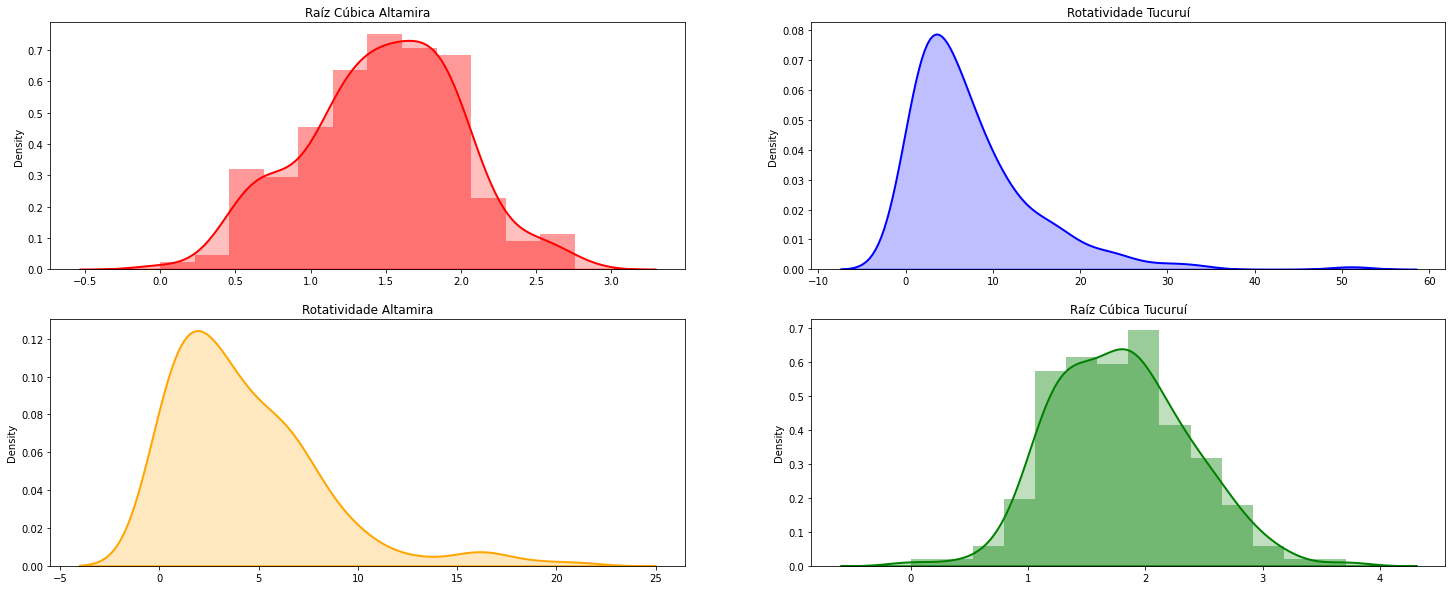

In [25]:
#seaborn em todas as transformações + original

fig, ax = plt.subplots(2, 2, figsize = (25, 10))

sns.distplot(rt_ae, hist = True, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Não Normal", color = "red", ax = ax[0, 0])
ax[0,0].set_title('Raíz Cúbica Altamira')
  
sns.distplot(rt_t, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Log", color = "blue", ax = ax[0, 1])
ax[0,1].set_title('Rotatividade Tucuruí')

sns.distplot(rt_a, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Raíz Cúbica", color = "orange", ax = ax[1, 0])
ax[1,0].set_title('Rotatividade Altamira')

sns.distplot(rt_te, hist = True, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = 'Box-Cox', color = 'green', ax = ax[1, 1])
ax[1,1].set_title('Raíz Cúbica Tucuruí')

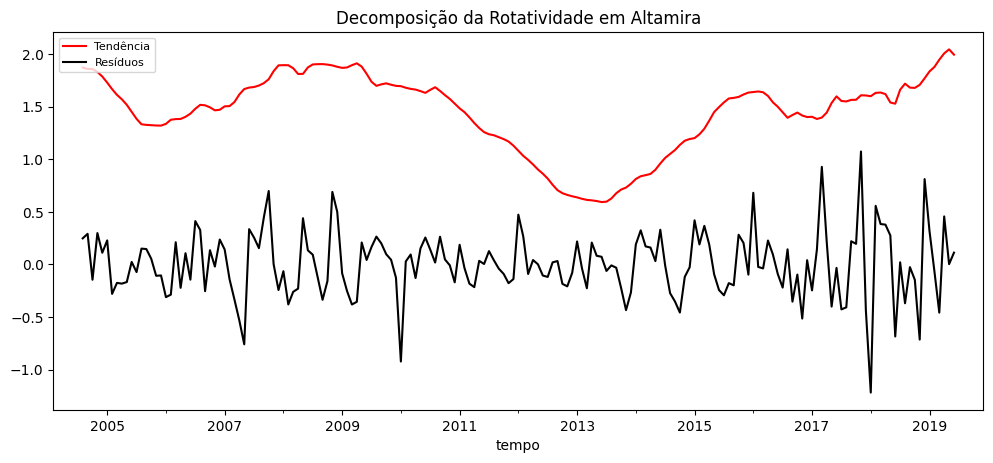

In [26]:
decomp1 = seasonal_decompose(rt_ae, period = 12)
plt.figure(figsize=(12,5), dpi=100)
decomp1.trend.plot(color = 'red', label = 'Tendência')
decomp1.resid.plot(color= 'black', label = 'Resíduos')
plt.title('Decomposição da Rotatividade em Altamira')
plt.legend(loc='upper left', fontsize=8)
plt.savefig('decompo.png', format='png')

plt.show()

In [27]:
def tsplot(y, lags=None, figsize=(20, 10), style='bmh'):
    """
        Plot time series, its ACF and PACF, calculate Dickey–Fuller test
        
        y - timeseries
        lags - how many lags to include in ACF, PACF calculation
    """
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()


## Autoreg com Sarimax

In [29]:
from pmdarima.arima import auto_arima

In [30]:
rt_ae

tempo
2004-02-01    1.944362
2004-03-01    1.486332
2004-04-01    1.556188
2004-05-01    1.858366
2004-06-01    1.998755
                ...   
2019-08-01    2.053665
2019-09-01    2.554365
2019-10-01    2.125317
2019-11-01    1.477563
2019-12-01    0.933322
Length: 191, dtype: float64

In [31]:
treino = rt_ae[:179]
teste = rt_ae[179:]

In [32]:
modelrt_a = auto_arima(treino, trace = True, stepwise = False, seasonal = True, max_p = 10, max_q = 10,
 max_P = 4, max_Q = 4, start_q = 0, start_p = 0, d = 2)

#modelrt_t = auto_arima(rt_te, trace = True, stepwise = False, seasonal = False, max_p = 10, max_q = 10,
 #max_P = 4, max_Q = 4, start_q = 0, start_p = 0, d = 2)

#trace = apresenta a lista dos modelos
#stepwise = seleção gradual (minucioso)
#m: período sazonal (caso, definir a sazonalidade)
#

 ARIMA(0,2,0)(0,0,0)[1]             : AIC=377.359, Time=1.32 sec
 ARIMA(0,2,1)(0,0,0)[1]             : AIC=inf, Time=1.04 sec
 ARIMA(0,2,2)(0,0,0)[1]             : AIC=inf, Time=1.82 sec
 ARIMA(0,2,3)(0,0,0)[1]             : AIC=inf, Time=2.30 sec
 ARIMA(0,2,4)(0,0,0)[1]             : AIC=inf, Time=2.39 sec
 ARIMA(0,2,5)(0,0,0)[1]             : AIC=inf, Time=2.87 sec
 ARIMA(1,2,0)(0,0,0)[1]             : AIC=328.925, Time=0.16 sec
 ARIMA(1,2,1)(0,0,0)[1]             : AIC=inf, Time=1.08 sec
 ARIMA(1,2,2)(0,0,0)[1]             : AIC=inf, Time=1.56 sec
 ARIMA(1,2,3)(0,0,0)[1]             : AIC=inf, Time=2.36 sec
 ARIMA(1,2,4)(0,0,0)[1]             : AIC=inf, Time=2.49 sec
 ARIMA(2,2,0)(0,0,0)[1]             : AIC=278.939, Time=0.24 sec
 ARIMA(2,2,1)(0,0,0)[1]             : AIC=inf, Time=1.17 sec
 ARIMA(2,2,2)(0,0,0)[1]             : AIC=inf, Time=3.01 sec
 ARIMA(2,2,3)(0,0,0)[1]             : AIC=175.141, Time=2.90 sec
 ARIMA(3,2,0)(0,0,0)[1]             : AIC=265.820, Time=0.23 sec
 ARI

In [33]:
print(modelrt_a.aic()) #os resultados anteriores beiravam 1000!

175.14074393857706


In [34]:
result_autorta = modelrt_a.fit(treino)
print(result_autorta.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  179
Model:               SARIMAX(2, 2, 3)   Log Likelihood                 -81.570
Date:                Mon, 07 Feb 2022   AIC                            175.141
Time:                        07:58:42   BIC                            194.198
Sample:                             0   HQIC                           182.869
                                - 179                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3619      0.136     -2.661      0.008      -0.628      -0.095
ar.L2          0.1985      0.084      2.359      0.018       0.034       0.363
ma.L1         -1.1239      0.116     -9.694      0.0

In [35]:
import statsmodels.formula.api as smf
from stargazer.stargazer import Stargazer

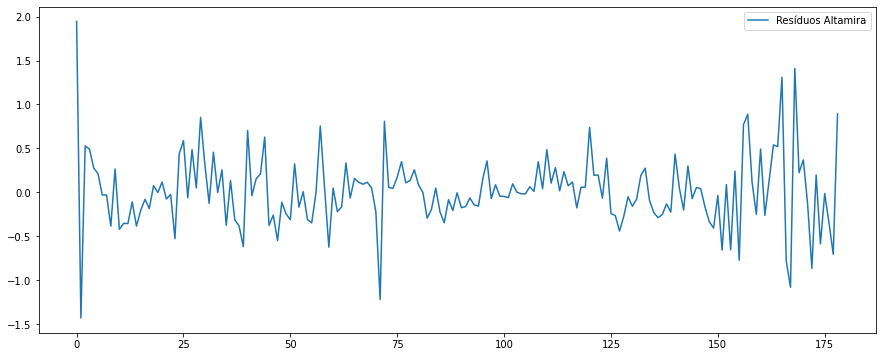

In [37]:
#Análise dos Resíduos
resia = result_autorta.resid
plt.plot(resia(), label = 'Resíduos Altamira')
plt.legend(loc = 'best')
plt.show()

In [38]:
normalidade(resia())

Teste Lilliefors: 0.0009999999999998899 Não Estocástico!
Teste Shapiro-Wilk: 1.7931835145645891e-06 Não Estocástico!


In [39]:
statsmodels.tsa.stattools.adfuller(resia())

(-15.703222736501154,
 1.3879366557933935e-28,
 0,
 178,
 {'1%': -3.467631519151906,
  '5%': -2.8779183721695567,
  '10%': -2.575501353364474},
 155.7667532778986)

In [40]:
kpss = statsmodels.tsa.stattools.kpss(resia())
kpss

/home/cleyton/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:2016: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




(0.03666442099842349,
 0.1,
 2,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

/home/cleyton/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



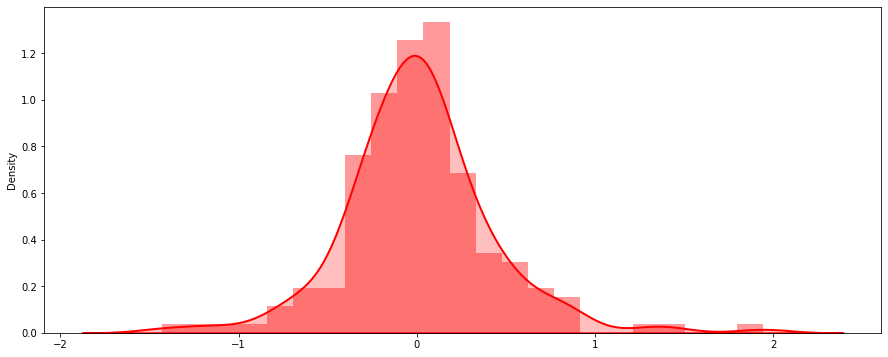

In [41]:
sns_plot =sns.distplot(resia(), hist = True, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Não Normal", color = "red")

sns_plot.figure.savefig("residuos_arima.png")

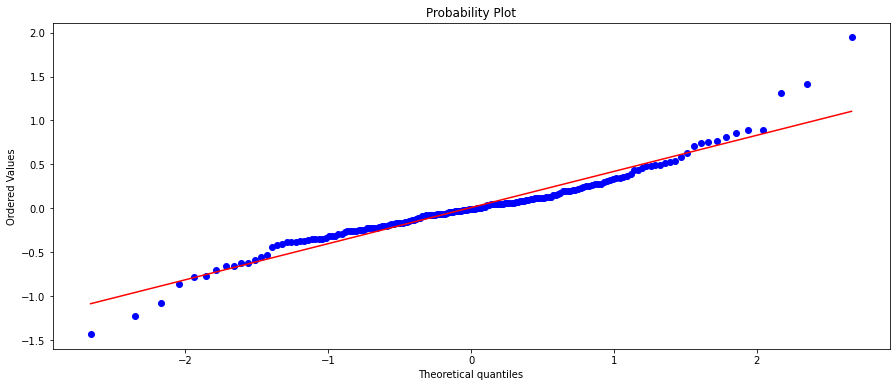

In [42]:
stats.probplot(resia(), dist = 'norm', plot = plt)

plt.show()

/home/cleyton/anaconda3/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



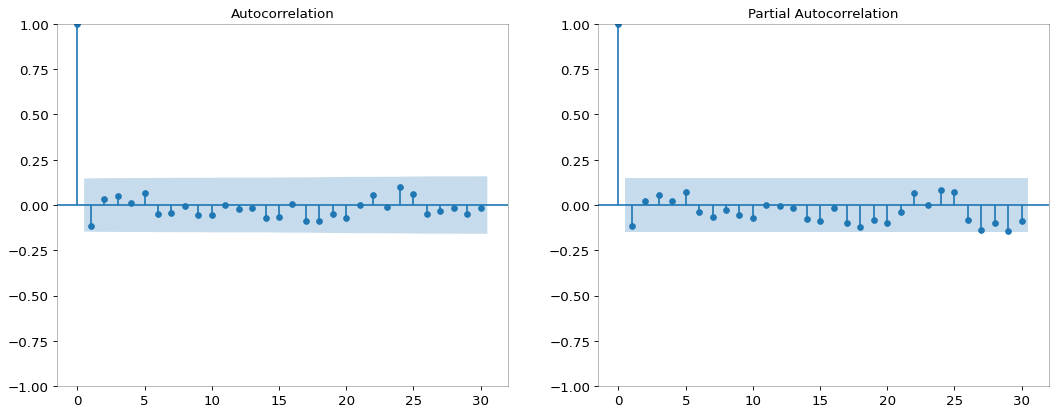

In [43]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,6), dpi= 80)
plot_acf(resia(), ax=ax1, lags=30)
plot_pacf(resia(), ax=ax2, lags=30)


ax1.spines["top"].set_alpha(.3); ax2.spines["top"].set_alpha(.3)
ax1.spines["bottom"].set_alpha(.3); ax2.spines["bottom"].set_alpha(.3)
ax1.spines["right"].set_alpha(.3); ax2.spines["right"].set_alpha(.3)
ax1.spines["left"].set_alpha(.3); ax2.spines["left"].set_alpha(.3)


ax1.tick_params(axis='both', labelsize=12)
ax2.tick_params(axis='both', labelsize=12)
plt.savefig('autocor.png', format='png')
plt.show()

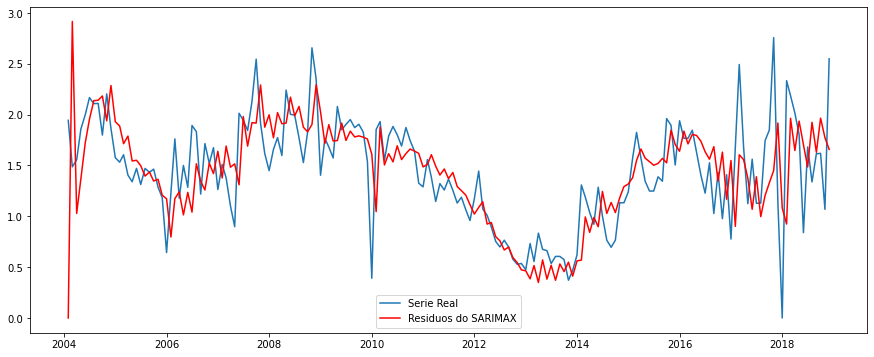

In [44]:
plt.plot(treino, label = 'Serie Real')
plt.plot(treino-resia(), color = 'red', label = 'Residuos do SARIMAX')
plt.legend(loc = 'best')
plt.show()

A partir de agora, testaremos os modelos de previsão...

## PREDICT

In [45]:
prediction = pd.DataFrame(modelrt_a.predict(n_periods = 12), index = teste.index)
prediction.columns=['predicted_tr']

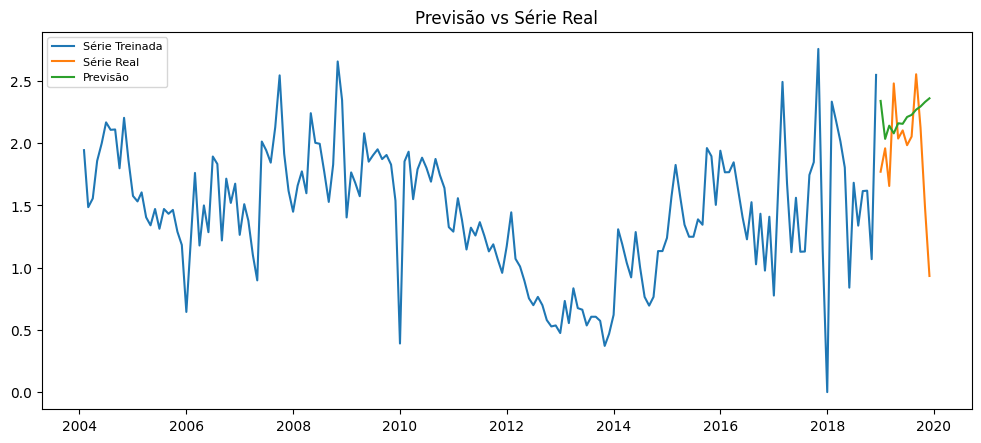

In [46]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(treino, label='Série Treinada')
plt.plot(teste, label='Série Real')
plt.plot(prediction, label='Previsão')
plt.title('Previsão vs Série Real')
plt.legend(loc='upper left', fontsize=8)
plt.show()

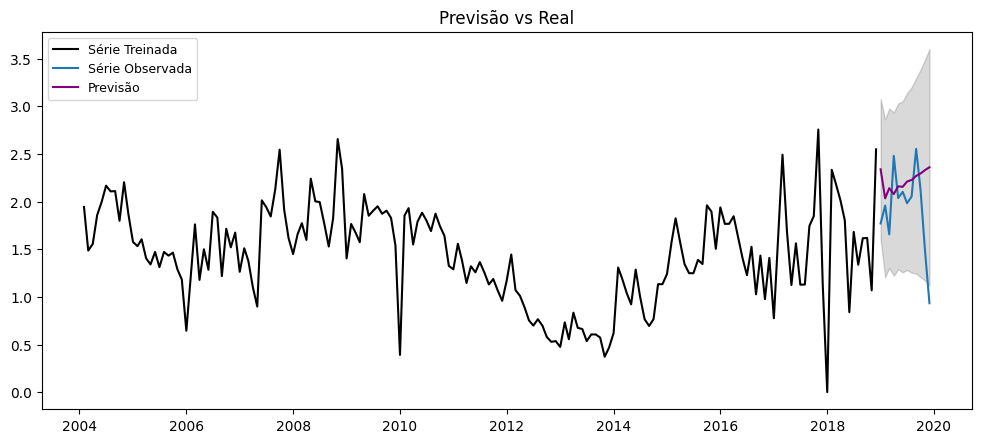

<Figure size 1200x500 with 0 Axes>

In [47]:
#matplotlib

preds, conf_int = modelrt_a.predict(n_periods=12, return_conf_int = True)

# Make as pandas series
fc_series = pd.Series(preds, index=teste.index)
lower_series = pd.Series(conf_int[:, 0], index=teste.index)
upper_series = pd.Series(conf_int[:, 1], index=teste.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(treino, label='Série Treinada', color = 'black')
plt.plot(teste, label='Série Observada')
plt.plot(fc_series, label='Previsão', color = 'purple')


plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Previsão vs Real')
plt.legend(loc='upper left', fontsize=9)

plt.savefig('previsao.png', format='png')
plt.figure(figsize=(12,5), dpi=100)

plt.show()

In [52]:
prediction['teste'] = teste
prediction

predicted_tr     teste
tempo                             
2019-01-01      2.340060  1.771098
2019-02-01      2.034890  1.959068
2019-03-01      2.141169  1.656504
2019-04-01      2.079489  2.480768
2019-05-01      2.160258  2.037745
2019-06-01      2.156142  2.103119
2019-07-01      2.211017  1.984251
2019-08-01      2.227697  2.053665
2019-09-01      2.269908  2.554365
2019-10-01      2.295298  2.125317
2019-11-01      2.331843  1.477563
2019-12-01      2.361013  0.933322

In [55]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from math import sqrt

mse = mean_squared_error(prediction['teste'], prediction['predicted_tr'])
mae = mean_absolute_error(prediction['teste'], prediction['predicted_tr'])
rmse = sqrt(mse)
mape = np.mean(np.abs((prediction['teste'] - prediction['predicted_tr'])/prediction['teste']))*100
rmsle = mean_squared_log_error(prediction['teste'], prediction['predicted_tr'])
print(mse, mae, rmse, mape, rmsle)

0.30856891691872046 0.40362265560329175 0.5554897991131075 28.315370956062363 0.04101892008352523
